In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.datasets.samples_generator import make_blobs 

In [4]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

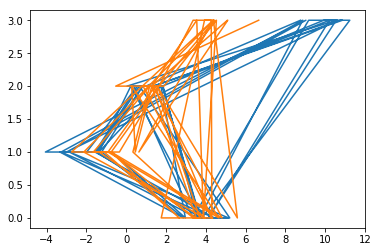

In [7]:
plt.plot(X1,y1)

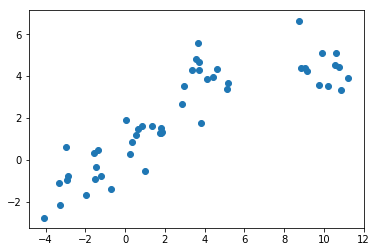

In [8]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

# Agglomerative Clustering

In [9]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [10]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func='deprecated')

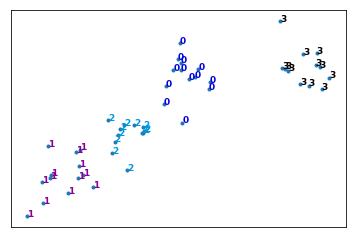

In [11]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

# Dendrogram Associated for the Agglomerative Hierarchical Clustering

In [12]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.91763802 0.76264039 ... 0.79180101 1.1288812  1.11059355]
 [0.91763802 0.         0.26473496 ... 0.18357431 0.22823757 0.2585525 ]
 [0.76264039 0.26473496 0.         ... 0.08318219 0.39954197 0.35695326]
 ...
 [0.79180101 0.18357431 0.08318219 ... 0.         0.34388699 0.31905202]
 [1.1288812  0.22823757 0.39954197 ... 0.34388699 0.         0.09770714]
 [1.11059355 0.2585525  0.35695326 ... 0.31905202 0.09770714 0.        ]]


In [13]:
Z = hierarchy.linkage(dist_matrix, 'complete')

c:\users\srivatsav\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


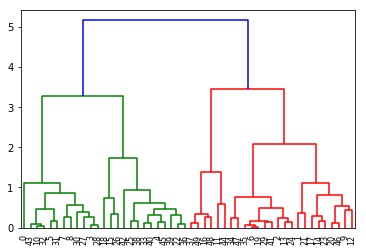

In [14]:
dendro = hierarchy.dendrogram(Z)